In [21]:
import geopandas as gpd
from api_call import api_call_multipolygons

%load_ext autoreload
%autoreload 2

In [22]:
cities = gpd.read_file('../raw_data/eu_cities.json')
cities

,city_name,country,geometry
0,Avilés,Spain,"MULTIPOLYGON (((-6.01180 43.44690, -6.00290 43..."
1,Oviedo,Spain,"MULTIPOLYGON (((-6.16250 43.03300, -6.15920 43..."
2,L'Aquila,Italy,"MULTIPOLYGON (((13.38080 42.18140, 13.39060 42..."
3,Pescara,Italy,"MULTIPOLYGON (((14.22960 42.41650, 14.24540 42..."
4,Altamura,Italy,"MULTIPOLYGON (((16.47270 40.97980, 16.44160 40..."
...,...,...,...
558,Yozgat,Turkey,"MULTIPOLYGON (((35.47180 39.18680, 35.48110 39..."
559,Bitola,NorthMacedonia,"MULTIPOLYGON (((21.51090 40.91160, 21.51120 40..."
560,Prilep,NorthMacedonia,"MULTIPOLYGON (((21.92760 41.10260, 21.92320 41..."
561,Tetovo,NorthMacedonia,"MULTIPOLYGON (((20.75460 41.94350, 20.76990 41..."


In [23]:
cities[cities['country'] == 'Greece']

,city_name,country,geometry
212,Athens,Greece,"MULTIPOLYGON (((23.71660 38.00970, 23.71540 38..."
213,Irakleio,Greece,"MULTIPOLYGON (((23.78290 38.04780, 23.78520 38..."
214,Ioannina,Greece,"MULTIPOLYGON (((20.92080 39.56410, 20.92620 39..."
215,Thessaloniki,Greece,"MULTIPOLYGON (((22.89850 40.64240, 22.90100 40..."
216,Kavala,Greece,"MULTIPOLYGON (((24.25090 40.96510, 24.33620 40..."
217,Kalamata,Greece,"MULTIPOLYGON (((22.02130 37.02040, 22.02120 37..."
218,Volos,Greece,"MULTIPOLYGON (((22.81900 39.27340, 22.82240 39..."


In [24]:
athens = cities[cities['city_name']=='Athens'].reset_index(drop=True)['geometry'][0]
athens.bounds

(23.6855, 37.9464, 23.7893, 38.031)

In [32]:
athens_y = api_call_multipolygons(multipolygon=athens,coord_uncertainty="0,1500",year="0,2023")

In [33]:
len(athens_y[0])

7800

In [34]:
european_capitals = ['Amsterdam', 'Andorra la Vella', 'Athens', 'Baku', 'Belgrade', 'Berlin', 'Bern', 'Bratislava', 'Brussels', 'Bucharest', 'Budapest', 'Chisinau', 'Copenhagen', 'Dublin', 'Helsinki', 'Kyiv', 'Lisbon', 'Ljubljana', 'London', 'Luxembourg', 'Madrid', 'Minsk', 'Monaco', 'Moscow', 'Nicosia', 'North Nicosia', 'Oslo', 'Paris', 'Podgorica', 'Prague', 'Reykjavik', 'Riga', 'Rome', 'San Marino', 'Sarajevo', 'Skopje', 'Sofia', 'Stockholm', 'Tallinn', 'Tbilisi', 'Tirana', 'Vaduz', 'Valletta', 'Vatican City', 'Vienna', 'Vilnius', 'Warsaw', 'Yerevan', 'Zagreb']


In [35]:
cities[cities['city_name'].isin(european_capitals)]

,city_name,country,geometry
94,Luxembourg,Luxembourg,"MULTIPOLYGON (((6.09680 49.56800, 6.10400 49.5..."
212,Athens,Greece,"MULTIPOLYGON (((23.71660 38.00970, 23.71540 38..."
283,Helsinki,Finland,"MULTIPOLYGON (((24.36860 59.91070, 24.36920 59..."
315,Berlin,Germany,"MULTIPOLYGON (((13.50020 52.61380, 13.50320 52..."
395,Oslo,Norway,"MULTIPOLYGON (((10.73250 59.85400, 10.72920 59..."
400,Ljubljana,Slovenia,"MULTIPOLYGON (((14.43940 45.97610, 14.44960 45..."
421,Amsterdam,Netherlands,"MULTIPOLYGON (((5.01990 52.32420, 5.00070 52.3..."
469,Valletta,Malta,"MULTIPOLYGON (((14.51180 35.89310, 14.51510 35..."
499,Stockholm,Sweden,"MULTIPOLYGON (((17.86390 59.26830, 17.87270 59..."
562,Podgorica,Montenegro,"MULTIPOLYGON (((19.41650 42.32890, 19.41460 42..."


In [36]:
capitals = cities[cities['city_name'].isin(european_capitals)].reset_index(drop=True)
capitals

,city_name,country,geometry
0,Luxembourg,Luxembourg,"MULTIPOLYGON (((6.09680 49.56800, 6.10400 49.5..."
1,Athens,Greece,"MULTIPOLYGON (((23.71660 38.00970, 23.71540 38..."
2,Helsinki,Finland,"MULTIPOLYGON (((24.36860 59.91070, 24.36920 59..."
3,Berlin,Germany,"MULTIPOLYGON (((13.50020 52.61380, 13.50320 52..."
4,Oslo,Norway,"MULTIPOLYGON (((10.73250 59.85400, 10.72920 59..."
5,Ljubljana,Slovenia,"MULTIPOLYGON (((14.43940 45.97610, 14.44960 45..."
6,Amsterdam,Netherlands,"MULTIPOLYGON (((5.01990 52.32420, 5.00070 52.3..."
7,Valletta,Malta,"MULTIPOLYGON (((14.51180 35.89310, 14.51510 35..."
8,Stockholm,Sweden,"MULTIPOLYGON (((17.86390 59.26830, 17.87270 59..."
9,Podgorica,Montenegro,"MULTIPOLYGON (((19.41650 42.32890, 19.41460 42..."


<Axes: >

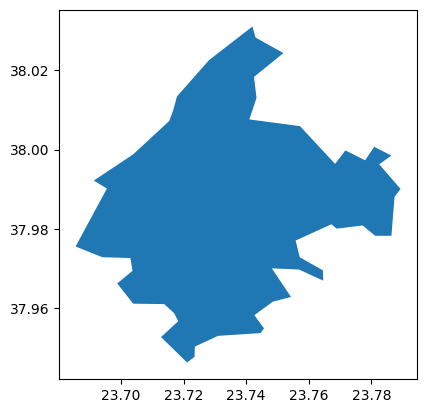

In [39]:
capitals[capitals['city_name']=='Athens'].plot()

In [47]:
swiss = gpd.read_file('../raw_data/raw_countries/gadm41_CHE_2.json')
swiss

,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,CHE.1.1_1,CHE,Switzerland,CHE.1_1,Aargau,NA,Aarau,NA,NA,District,District,NA,CH.AG.AA,"MULTIPOLYGON (((8.08800 47.32320, 8.08670 47.3..."
1,CHE.1.2_1,CHE,Switzerland,CHE.1_1,Aargau,NA,Baden,NA,NA,District,District,NA,CH.AG.BA,"MULTIPOLYGON (((8.36700 47.40370, 8.37940 47.4..."
2,CHE.1.3_1,CHE,Switzerland,CHE.1_1,Aargau,NA,Bremgarten,NA,NA,District,District,NA,CH.AG.BG,"MULTIPOLYGON (((8.42720 47.30400, 8.42230 47.3..."
3,CHE.1.4_1,CHE,Switzerland,CHE.1_1,Aargau,NA,Brugg,NA,NA,District,District,NA,CH.AG.BR,"MULTIPOLYGON (((8.09900 47.42480, 8.09510 47.4..."
4,CHE.1.5_1,CHE,Switzerland,CHE.1_1,Aargau,NA,Kulm,NA,NA,District,District,NA,CH.AG.KU,"MULTIPOLYGON (((8.20690 47.24690, 8.20420 47.2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,CHE.26.9_1,CHE,Switzerland,CHE.26_1,Zürich,NA,Pfäffikon,NA,NA,District,District,NA,CH.ZH.PF,"MULTIPOLYGON (((8.85480 47.36060, 8.84320 47.3..."
165,CHE.26.10_1,CHE,Switzerland,CHE.26_1,Zürich,NA,Schaffhausen,NA,NA,District,District,NA,NA,"MULTIPOLYGON (((8.57200 47.57580, 8.56860 47.5..."
166,CHE.26.11_1,CHE,Switzerland,CHE.26_1,Zürich,NA,Uster,NA,NA,District,District,NA,CH.ZH.US,"MULTIPOLYGON (((8.73190 47.29340, 8.73200 47.2..."
167,CHE.26.12_1,CHE,Switzerland,CHE.26_1,Zürich,NA,Winterthur,NA,NA,District,District,NA,CH.ZH.WT,"MULTIPOLYGON (((8.90240 47.45920, 8.90910 47.4..."


In [51]:
capitals

,city_name,country,geometry
0,Luxembourg,Luxembourg,"MULTIPOLYGON (((6.09680 49.56800, 6.10400 49.5..."
1,Athens,Greece,"MULTIPOLYGON (((23.71660 38.00970, 23.71540 38..."
2,Helsinki,Finland,"MULTIPOLYGON (((24.36860 59.91070, 24.36920 59..."
3,Berlin,Germany,"MULTIPOLYGON (((13.50020 52.61380, 13.50320 52..."
4,Oslo,Norway,"MULTIPOLYGON (((10.73250 59.85400, 10.72920 59..."
5,Ljubljana,Slovenia,"MULTIPOLYGON (((14.43940 45.97610, 14.44960 45..."
6,Amsterdam,Netherlands,"MULTIPOLYGON (((5.01990 52.32420, 5.00070 52.3..."
7,Valletta,Malta,"MULTIPOLYGON (((14.51180 35.89310, 14.51510 35..."
8,Stockholm,Sweden,"MULTIPOLYGON (((17.86390 59.26830, 17.87270 59..."
9,Podgorica,Montenegro,"MULTIPOLYGON (((19.41650 42.32890, 19.41460 42..."


In [65]:
import pandas as pd
zurich = swiss[swiss['NAME_2']=='Zürich'][['NAME_2','COUNTRY','geometry']]
zurich['NAME_2'] = 'Zurich'
zurich.columns = capitals.columns
capitals = pd.concat([capitals,zurich])
capitals

,city_name,country,geometry
0,Luxembourg,Luxembourg,"MULTIPOLYGON (((6.09680 49.56800, 6.10400 49.5..."
1,Athens,Greece,"MULTIPOLYGON (((23.71660 38.00970, 23.71540 38..."
2,Helsinki,Finland,"MULTIPOLYGON (((24.36860 59.91070, 24.36920 59..."
3,Berlin,Germany,"MULTIPOLYGON (((13.50020 52.61380, 13.50320 52..."
4,Oslo,Norway,"MULTIPOLYGON (((10.73250 59.85400, 10.72920 59..."
5,Ljubljana,Slovenia,"MULTIPOLYGON (((14.43940 45.97610, 14.44960 45..."
6,Amsterdam,Netherlands,"MULTIPOLYGON (((5.01990 52.32420, 5.00070 52.3..."
7,Valletta,Malta,"MULTIPOLYGON (((14.51180 35.89310, 14.51510 35..."
8,Stockholm,Sweden,"MULTIPOLYGON (((17.86390 59.26830, 17.87270 59..."
9,Podgorica,Montenegro,"MULTIPOLYGON (((19.41650 42.32890, 19.41460 42..."


In [66]:
france = gpd.read_file('../raw_data/raw_countries/gadm41_FRA_2.json')
paris = france[france['NAME_2'] == 'Paris'][['NAME_2','COUNTRY','geometry']]
paris.columns = capitals.columns
capitals = pd.concat([capitals,paris])
capitals

,city_name,country,geometry
0,Luxembourg,Luxembourg,"MULTIPOLYGON (((6.09680 49.56800, 6.10400 49.5..."
1,Athens,Greece,"MULTIPOLYGON (((23.71660 38.00970, 23.71540 38..."
2,Helsinki,Finland,"MULTIPOLYGON (((24.36860 59.91070, 24.36920 59..."
3,Berlin,Germany,"MULTIPOLYGON (((13.50020 52.61380, 13.50320 52..."
4,Oslo,Norway,"MULTIPOLYGON (((10.73250 59.85400, 10.72920 59..."
5,Ljubljana,Slovenia,"MULTIPOLYGON (((14.43940 45.97610, 14.44960 45..."
6,Amsterdam,Netherlands,"MULTIPOLYGON (((5.01990 52.32420, 5.00070 52.3..."
7,Valletta,Malta,"MULTIPOLYGON (((14.51180 35.89310, 14.51510 35..."
8,Stockholm,Sweden,"MULTIPOLYGON (((17.86390 59.26830, 17.87270 59..."
9,Podgorica,Montenegro,"MULTIPOLYGON (((19.41650 42.32890, 19.41460 42..."


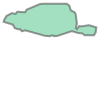

In [70]:
paris['geometry'][49]

In [71]:
athens_y = api_call_multipolygons(multipolygon=paris['geometry'][49],coord_uncertainty="0,1000",year="2010,2023")

KeyboardInterrupt: 

In [73]:
import numpy as np
np_y = np.array(athens_y)
print(np_y.shape)

(1, 7800, 2)


array([[37.974113, 23.708609],
       [37.977833, 23.717316],
       [37.9832  , 23.744875],
       ...,
       [37.983333, 23.733333],
       [37.983333, 23.733333],
       [38.      , 23.75    ]])

In [80]:
capitals = capitals.reset_index(drop=True).drop([0,7,9]).reset_index(drop=True)

In [81]:
capitals.to_file('../data/capital_shapes.json',driver='GeoJSONSeq')

In [2]:
capitals = gpd.read_file('../data/capital_shapes.json')

In [3]:
athens_bounds = capitals[capitals['city_name']=='Athens'].total_bounds

In [88]:
import dask.dataframe as dd

TypeError: An error occurred while calling the read_csv method registered to the pandas backend.
Original Message: make_reader.<locals>.read() missing 1 required positional argument: 'urlpath'

In [48]:
import dask.dataframe as dd
import geopandas as gpd
import pandas as pd
import numpy as np

def try_float(val):
    try:
        return np.float32(val)
    except ValueError:
        print(f'value error! {val}')
        return np.nan
def filter_csv_to_geojson(csv_path, bbox):
    """
    Filter the CSV file to include only the rows that are within the specified bounding box
    and save the result as a GeoJSON file.

    Parameters
    ----------
    csv_path : str
        The path to the CSV file.
    bbox : tuple
        A tuple of four float values representing the bounding box coordinates in the following order:
        (minimum longitude, minimum latitude, maximum longitude, maximum latitude)

    Returns
    -------
    gdf : GeoPandas GeoDataFrame
        The GeoPandas GeoDataFrame containing the filtered points.
    """
    # Read the CSV file into a Dask dataframe
    chunksize=1000000
    reader = pd.read_csv(csv_path,sep='\t',header=0, usecols=['decimalLongitude','decimalLatitude'],
                      converters={'decimalLongitude':try_float,'decimalLatitude':try_float},
                      on_bad_lines='skip',chunksize=chunksize)
    filtered_dfs = []
    for chunk in reader:
        bbox_mask = (chunk['decimalLongitude'] >= bbox[0]) & (chunk['decimalLatitude'] >= bbox[1]) & (chunk['decimalLongitude'] <= bbox[2]) & (chunk['decimalLatitude'] <= bbox[3])
        filtered_chunk = chunk[bbox_mask]
        filtered_dfs.append(filtered_chunk)

    filtered_df = pd.concat(filtered_dfs, ignore_index=True)

    # Filter the dataframe to include only the rows that are within the specified bounding box
    



    # Convert the filtered dataframe to a GeoPandas dataframe
    #geometry = gpd.points_from_xy(filtered_ddf['decimalLongitude'], filtered_ddf['decimalLatitude'])
    #gdf = gpd.GeoDataFrame(filtered_ddf.compute(), geometry=geometry)

    # Save the filtered GeoDataFrame as a GeoJSON file
    #output_path = f'../raw_data/filtered_{bbox}.geojson'
    #gdf.to_file(output_path, driver='GeoJSON')

    return filtered_df


In [40]:
csv_path = '/Users/zilikons/code/zilikons/demeter/raw_data/europe_bio.csv'
df = pd.read_csv(csv_path, sep='\t', dtype={'gbifID': int, 'decimalLongitude': 'float32', 'decimalLatitude': 'float32'}, on_bad_lines='skip', nrows=1000)


In [45]:
df[['decimalLongitude','decimalLatitude']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   decimalLongitude  1000 non-null   float32
 1   decimalLatitude   1000 non-null   float32
dtypes: float32(2)
memory usage: 7.9 KB


In [49]:
athens_y = filter_csv_to_geojson(csv_path,athens_bounds)

In [50]:
athens_y

,decimalLatitude,decimalLongitude
0,37.981228,23.710411
1,38.001461,23.750767
2,37.965450,23.760036
3,37.965363,23.778196
4,37.978859,23.766043
...,...,...
5763,37.969551,23.727007
5764,37.971264,23.723850
5765,37.978043,23.713034
5766,37.971390,23.725712
